#### 4-Outliers Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Datasets/states_all.csv')
cols = df.columns



In [3]:
cols_to_drop = cols[np.where((df.isnull().sum())/len(df) > 0.5)].to_list() # columns with missing values more than 50%


In [4]:
df.drop(cols_to_drop, axis=1, inplace=True) # drop columns
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0


In [5]:
# build new dataframe with the data types and counts

edu_datatype = pd.concat([df.dtypes, df.nunique(), round(df.nunique()*100/len(df), 2),
                          df.isnull().sum(), round(df.isnull().sum()*100/len(df), 2)], axis=1)
edu_datatype.columns = ['data type', 'No. of categories',
                        'No. of categories %', 'missing values', 'missing values %']
edu_datatype.sort_values(by='missing values %', ascending=False, inplace=True)

edu_datatype = edu_datatype.loc[edu_datatype['missing values'] != 0]

edu_datatype


,data type,No. of categories,No. of categories %,missing values,missing values %
GRADES_1_8_G,float64,1020,59.48,695,40.52
GRADES_9_12_G,float64,1070,62.39,644,37.55
ENROLL,float64,1224,71.37,491,28.63
OTHER_EXPENDITURE,float64,1222,71.25,491,28.63
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.34,440,25.66
TOTAL_REVENUE,float64,1274,74.29,440,25.66
FEDERAL_REVENUE,float64,1275,74.34,440,25.66
STATE_REVENUE,float64,1251,72.94,440,25.66
LOCAL_REVENUE,float64,1275,74.34,440,25.66
TOTAL_EXPENDITURE,float64,1275,74.34,440,25.66


In [6]:
edu_datatype.index

Index(['GRADES_1_8_G', 'GRADES_9_12_G', 'ENROLL', 'OTHER_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_8_G', 'GRADES_12_G', 'GRADES_ALL_G', 'GRADES_4_G',
       'GRADES_KG_G'],
      dtype='object')

In [7]:
df_time_series_imputed_median = df.copy(deep=True)

for col in df.columns:
    if col in edu_datatype.index:
        df_time_series_imputed_median[col] = df_time_series_imputed_median[col].fillna(df_time_series_imputed_median[col].median())


In [8]:
df_time_series_imputed_median.isnull().sum()/len(df_time_series_imputed_median)


PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
dtype: float64

In [9]:
df_time_series_imputed_median_part = df_time_series_imputed_median.loc[:, ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]
df_time_series_imputed_median_part


,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,2678885.0,2653798.0
1,1049591.0,972488.0
2,3258079.0,3401580.0
3,1711959.0,1743022.0
4,26260025.0,27138832.0
...,...,...
1710,5085826.0,5242672.0
1711,5085826.0,5242672.0
1712,5085826.0,5242672.0
1713,5085826.0,5242672.0


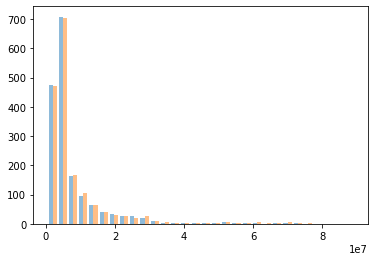

In [10]:
plt.hist(df_time_series_imputed_median_part, alpha=0.5, bins=30)
plt.show()



<AxesSubplot:>

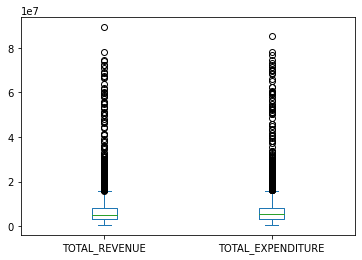

In [11]:
df_time_series_imputed_median_part.plot(kind='box')

# TOTAL_REVENUE and TOTAL_EXPENDITURE have outlier values


2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.



(array([[  3.,  10.,  21.,  30.,  37.,  59.,  46.,  64.,  62.,  56.,  66.,
          59.,  81., 506.,  86.,  71.,  80.,  61.,  59.,  58.,  36.,  37.,
          34.,  38.,  10.,   7.,  10.,  15.,  11.,   2.],
        [  3.,  10.,  24.,  26.,  39.,  54.,  48.,  65.,  63.,  62.,  60.,
          56.,  77., 504.,  87.,  73.,  81.,  72.,  57.,  51.,  40.,  36.,
          31.,  38.,   9.,  10.,  10.,  15.,  11.,   3.]]),
 array([13.05118956, 13.22636941, 13.40154926, 13.57672911, 13.75190896,
        13.92708881, 14.10226867, 14.27744852, 14.45262837, 14.62780822,
        14.80298807, 14.97816792, 15.15334777, 15.32852763, 15.50370748,
        15.67888733, 15.85406718, 16.02924703, 16.20442688, 16.37960673,
        16.55478659, 16.72996644, 16.90514629, 17.08032614, 17.25550599,
        17.43068584, 17.60586569, 17.78104554, 17.9562254 , 18.13140525,
        18.3065851 ]),
 <a list of 2 BarContainer objects>)

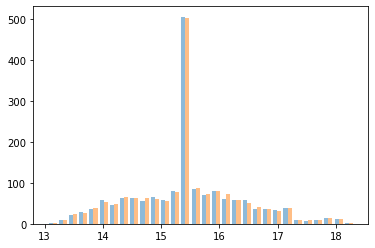

In [12]:
plt.hist(np.log(df_time_series_imputed_median_part), alpha=0.5, bins=30)


<AxesSubplot:>

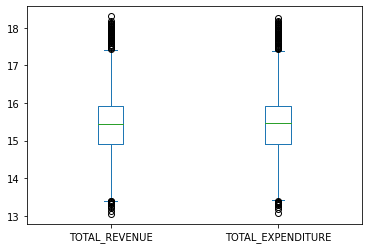

In [13]:
np.log(df_time_series_imputed_median_part).plot(kind='box')


In [118]:
from scipy.stats.mstats import winsorize

df_time_series_imputed_median['Total_Revenue_winsorizing'] = winsorize(
    np.array(df_time_series_imputed_median['TOTAL_REVENUE']), (0.0, 0.10))
df_time_series_imputed_median['Total_EXPENDITURE_winsorizing'] = winsorize(
    np.array(df_time_series_imputed_median['TOTAL_EXPENDITURE']), (0.0, 0.10))
df_time_series_imputed_median['Total_Revenue_winsorizing'].describe()
df_time_series_imputed_median['Total_EXPENDITURE_winsorizing'].describe()


count    1.715000e+03
mean     6.598210e+06
std      4.994703e+06
min      4.816650e+05
25%      3.004448e+06
50%      5.242672e+06
75%      8.220253e+06
max      1.766835e+07
Name: Total_EXPENDITURE_winsorizing, dtype: float64

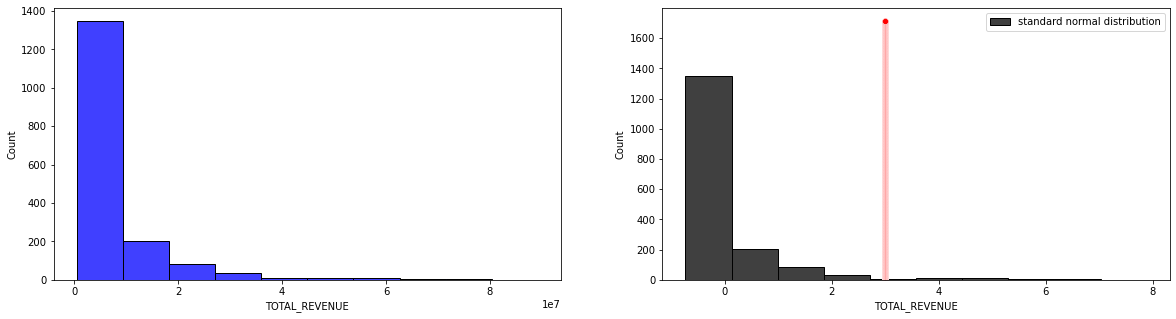

In [86]:
#Soudeh

from scipy.stats import zscore 

z_score = zscore(df_time_series_imputed_median['TOTAL_REVENUE'])

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(df_time_series_imputed_median['TOTAL_REVENUE'],
             color='blue', ax=ax[0], label='original distribution', bins=10)
sns.histplot(z_score, color='black', ax=ax[1], label='standard normal distribution', bins=10)
Line = pd.Series(np.ones(len(df))*3, index=df_time_series_imputed_median.index)
sns.scatterplot(x=Line.values, y=Line.index, ax=ax[1], color='red')
plt.legend()
plt.show()

In [81]:
df['TOTAL_REVENUE']


0        2678885.0
1        1049591.0
2        3258079.0
3        1711959.0
4       26260025.0
           ...    
1710           NaN
1711           NaN
1712           NaN
1713           NaN
1714           NaN
Name: TOTAL_REVENUE, Length: 1715, dtype: float64

In [88]:
for i in range(1,5):
    print("The score threshold is {}".format(i))
    print("The indices of the outliers: ")
    print("Number of outlilers is: {}".format(len((np.where(z_score > i)[0]))))
    print("---"*40)

The score threshold is 1
The indices of the outliers: 
Number of outlilers is: 164
------------------------------------------------------------------------------------------------------------------------
The score threshold is 2
The indices of the outliers: 
Number of outlilers is: 70
------------------------------------------------------------------------------------------------------------------------
The score threshold is 3
The indices of the outliers: 
Number of outlilers is: 43
------------------------------------------------------------------------------------------------------------------------
The score threshold is 4
The indices of the outliers: 
Number of outlilers is: 33
------------------------------------------------------------------------------------------------------------------------


In [98]:
p25_log, p75_log = np.percentile(
    np.log(df_time_series_imputed_median['TOTAL_REVENUE']), [25,75])
p25, p75 = np.percentile(df_time_series_imputed_median['TOTAL_REVENUE'], [25,75])

IQR_log = p75_log - p25_log 
IQR = p75 - p25

log_threshold_values = []

for threshold_value in np.arange(1,5,0.5):
    min_value_log = p25_log - (IQR_log*threshold_value)
    max_value_log = p75_log + (IQR_log*threshold_value)
    min_value = p25 - (IQR*threshold_value)
    max_value = p75 + (IQR*threshold_value)
    
    outlier_value_number_log = len(np.where((np.log(df_time_series_imputed_median['TOTAL_REVENUE']) > max_value_log) | 
                                            (np.log(df_time_series_imputed_median['TOTAL_REVENUE']) < min_value_log))[0])
    outlier_value_number = len(np.where((df_time_series_imputed_median['TOTAL_REVENUE'] > max_value) | 
                                        (df_time_series_imputed_median['TOTAL_REVENUE'] < min_value))[0])
    log_threshold_values.append({'threshold_value':threshold_value,
                                 'outlier_value_number': outlier_value_number,
                                 'outlier_value_number_log': outlier_value_number_log})
    
    df_outliers = pd.DataFrame(log_threshold_values)
    

In [99]:
df_outliers


,threshold_value,outlier_value_number,outlier_value_number_log
0,1.0,246,218
1,1.5,195,58
2,2.0,161,15
3,2.5,132,0
4,3.0,111,0
5,3.5,90,0
6,4.0,70,0
7,4.5,54,0


3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.



<AxesSubplot:>

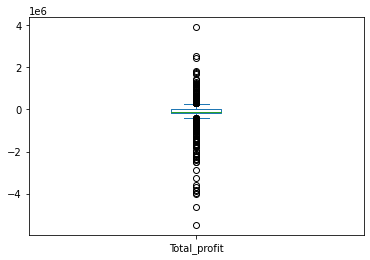

In [14]:
df_time_series_imputed_median['Total_profit'] = df_time_series_imputed_median['TOTAL_REVENUE'] - \
    df_time_series_imputed_median['TOTAL_EXPENDITURE']
df_time_series_imputed_median['Total_profit'].plot(kind='box')


/opt/homebrew/Caskroom/miniforge/base/envs/tf_M1/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

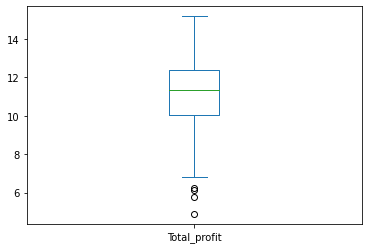

In [15]:
np.log(df_time_series_imputed_median['Total_profit']).plot(kind='box')


(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 6.000e+00, 6.000e+00,
        1.200e+01, 1.600e+01, 2.200e+01, 5.400e+01, 2.050e+02, 1.176e+03,
        1.370e+02, 3.600e+01, 1.400e+01, 8.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-10.83658675, -10.20530641,  -9.57402606,  -8.94274572,
         -8.31146537,  -7.68018503,  -7.04890469,  -6.41762434,
         -5.786344  ,  -5.15506365,  -4.52378331,  -3.89250297,
         -3.26122262,  -2.62994228,  -1.99866193,  -1.36738159,
         -0.73610125,  -0.1048209 ,   0.52645944,   1.15773979,
          1.78902013,   2.42030047,   3.05158082,   3.68286116,
          4.31414151,   4.94542185,   5.57670219,   6.20798254,
          6.83926288,   7.47054323,   8.10182357]),
 <BarContainer object of 30 artists>)

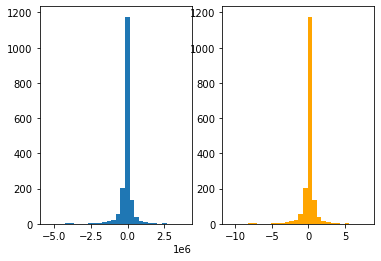

In [110]:
from scipy.stats import zscore 

zscore_profit = zscore(df_time_series_imputed_median['Total_profit'])

plt.subplot(1, 2, 1)
plt.hist(df_time_series_imputed_median['Total_profit'], bins=30)

plt.subplot(1, 2, 2)
plt.hist(zscore_profit, bins=30, color='orange')



(array([ 20.,   3.,   0.,   4.,   4.,   2.,   6.,   4.,   9.,   2.,   4.,
         11.,  14.,   6.,  24.,  28.,  43.,  94., 581., 340., 282.,  92.,
         36.,  31.,  21.,  18.,   4.,   8.,   2.,  22.]),
 array([-2149001.        , -2041434.06666667, -1933867.13333333,
        -1826300.2       , -1718733.26666667, -1611166.33333333,
        -1503599.4       , -1396032.46666667, -1288465.53333333,
        -1180898.6       , -1073331.66666667,  -965764.73333333,
         -858197.8       ,  -750630.86666667,  -643063.93333333,
         -535497.        ,  -427930.06666667,  -320363.13333333,
         -212796.2       ,  -105229.26666667,     2337.66666667,
          109904.6       ,   217471.53333333,   325038.46666667,
          432605.4       ,   540172.33333333,   647739.26666667,
          755306.2       ,   862873.13333333,   970440.06666667,
         1078007.        ]),
 <BarContainer object of 30 artists>)

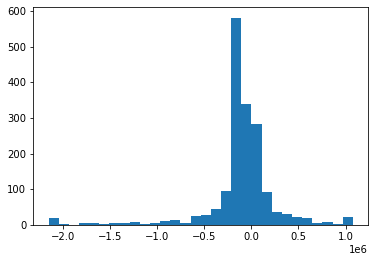

In [117]:
from scipy.stats.mstats import winsorize
df_time_series_imputed_median['TOTAL_PROFIT_winsorization'] = winsorize(
    np.array(df_time_series_imputed_median['Total_profit']), limits=0.01)
plt.hist(df_time_series_imputed_median['TOTAL_PROFIT_winsorization'], bins=30)


4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.



In [ ]:
#Soudeh



In [ ]:
df_time_series_imputed_median['Total_Revenue_winsorizing'] = winsorize(
    np.array(df_time_series_imputed_median['TOTAL_REVENUE']), (0.0, 0.10))
df_time_series_imputed_median['Total_EXPENDITURE_winsorizing'] = winsorize(
    np.array(df_time_series_imputed_median['TOTAL_EXPENDITURE']), (0.0, 0.10))

<AxesSubplot:>

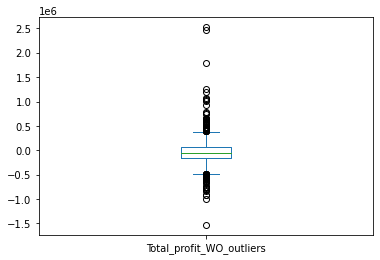

In [119]:
df_time_series_imputed_median['Total_profit_WO_outliers'] = df_time_series_imputed_median['Total_Revenue_winsorizing'] - \
    df_time_series_imputed_median['Total_EXPENDITURE_winsorizing']
df_time_series_imputed_median['Total_profit_WO_outliers'].plot(kind='box')


(array([1.000e+00, 1.200e+01, 8.000e+01, 1.237e+03, 3.520e+02, 2.300e+01,
        7.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([-6.41701693, -4.67424318, -2.93146944, -1.18869569,  0.55407805,
         2.29685179,  4.03962554,  5.78239928,  7.52517302,  9.26794677,
        11.01072051]),
 <BarContainer object of 10 artists>)

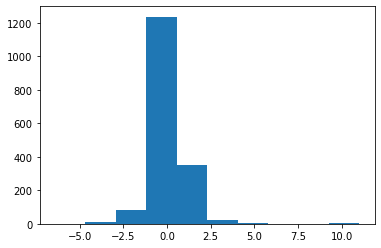

In [135]:
from scipy.stats import zscore 

zscore_Total_profit_WO_outliers = zscore(
    df_time_series_imputed_median['Total_profit_WO_outliers'])

plt.hist(zscore_Total_profit_WO_outliers)


(array([ 37.,  29.,  67., 577., 330., 325., 259.,  33.,  25.,  33.]),
 array([-629077. , -504087.1, -379097.2, -254107.3, -129117.4,   -4127.5,
         120862.4,  245852.3,  370842.2,  495832.1,  620822. ]),
 <BarContainer object of 10 artists>)

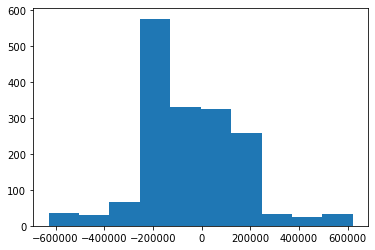

In [134]:
from scipy.stats.mstats import winsorize
df_time_series_imputed_median['Total_profit_WO_outliers_winsorization'] = winsorize(
    np.array(df_time_series_imputed_median['Total_profit_WO_outliers']), limits=0.01)
plt.hist(df_time_series_imputed_median['Total_profit_WO_outliers_winsorization'])

# why the plot shows many extreme values at two ends??? df_time_series_imputed_median['Total_profit_WO_outliers_winsorization'] = winsorize(np.array(df_time_series_imputed_median['Total_profit_WO_outliers']), (0.1,0.1))

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?



In [136]:
from scipy.stats import ttest_ind
ttest_ind(df_time_series_imputed_median['Total_profit_WO_outliers_winsorization'], 
          df_time_series_imputed_median['TOTAL_PROFIT_winsorization'])

# Yes, the results are significantly different.

Ttest_indResult(statistic=6.517021043046661, pvalue=8.221216368018381e-11)

In [ ]:
#Soudeh

outlier_comparison_df = pd.concat([deficit_df.describe().describe(),
                                  deficit_df_logscale.describe(),
                                  deficit_df_log_individual.describe(),
                                  deficit_df_log_individual_log.describe().describe()],
                                  axis=1)


6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

In [137]:
# The method from the 3rd quesion is more appropriate since I used the original data, thus less manipulation.

# log transformation should be applied